## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
print(len(combined_df["Mouse ID"].unique()))

249


In [3]:
combined_df["UI"]=combined_df["Mouse ID"] + combined_df["Timepoint"].astype(str)
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),UI
0,b128,0,45.0,0,Capomulin,Female,9,22,b1280
1,f932,0,45.0,0,Ketapril,Male,15,29,f9320
2,g107,0,45.0,0,Ketapril,Female,2,29,g1070
3,a457,0,45.0,0,Ketapril,Female,11,30,a4570
4,c819,0,45.0,0,Ketapril,Male,21,25,c8190


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grp_ui_df=combined_df.groupby(["UI"])
mouse_id=grp_ui_df["Mouse ID"].min()
records=grp_ui_df["Mouse ID"].count()

count_df = pd.DataFrame({"Mouse ID":mouse_id,"record_count":records})

dup_mouseid_df = count_df.loc[count_df["record_count"] > 1,:]

dup_mouseid_df

,Mouse ID,record_count
UI,,
g9890,g989,2
g98910,g989,2
g98915,g989,2
g98920,g989,2
g9895,g989,2


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

analysis_df=combined_df.loc[combined_df["Mouse ID"] != "g989",:] 

analysis_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),UI
0,b128,0,45.0,0,Capomulin,Female,9,22,b1280
1,f932,0,45.0,0,Ketapril,Male,15,29,f9320
2,g107,0,45.0,0,Ketapril,Female,2,29,g1070
3,a457,0,45.0,0,Ketapril,Female,11,30,a4570
4,c819,0,45.0,0,Ketapril,Male,21,25,c8190


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(analysis_df["Mouse ID"].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
grp_reg_df=analysis_df.groupby(["Drug Regimen"])

mean_vol=grp_reg_df["Tumor Volume (mm3)"].mean()
median_vol=grp_reg_df["Tumor Volume (mm3)"].median()
var_vol=grp_reg_df["Tumor Volume (mm3)"].var()
std_vol=grp_reg_df["Tumor Volume (mm3)"].std()
sem_vol=grp_reg_df["Tumor Volume (mm3)"].sem()

cnt_UI=grp_reg_df["UI"].count()

reg_stat_df = pd.DataFrame({"Mean": mean_vol,
                            "Median": median_vol,
                            "Variance": var_vol,
                            "Standard Deviation": std_vol,
                            "SEM": sem_vol
                           })

reg_stat_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

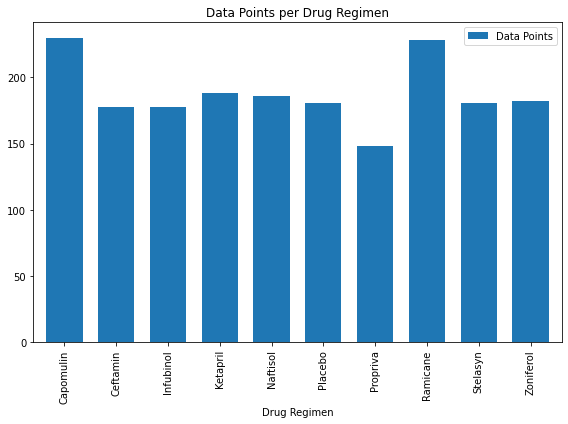

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
records_regimen=pd.DataFrame({"Data Points": cnt_UI})

records_regimen.plot(kind="bar", y="Data Points", figsize=(8,6) ,width=0.7, title="Data Points per Drug Regimen")
plt.legend(loc="best")

plt.tight_layout()



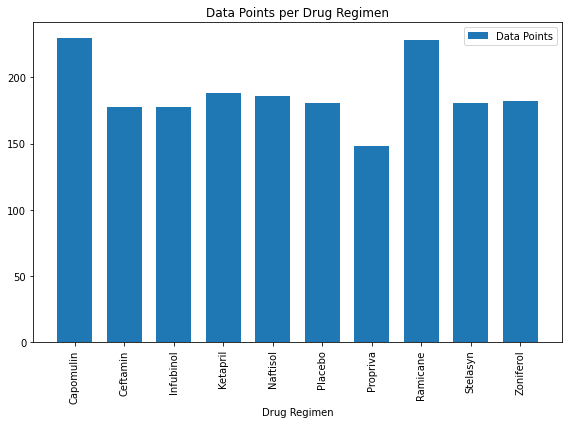

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis=sorted(analysis_df["Drug Regimen"].unique())
y_axis=cnt_UI

plt.figure(figsize=(8,6))
plt.bar(x_axis, y_axis, align="center", width=0.7, label="Data Points")
plt.xticks(x_axis,rotation="vertical")
plt.title("Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.legend(loc="best")

plt.tight_layout()



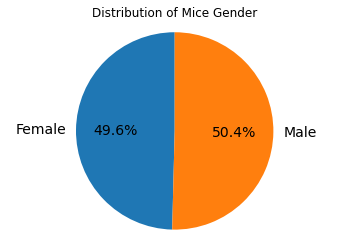

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grp_sex_df=analysis_df.groupby(["Sex"])

cnt_mice=grp_sex_df["Mouse ID"].nunique()

sex_df = pd.DataFrame({"Count Mice": cnt_mice})

sex_pct = sex_df.plot(kind="pie",y="Count Mice", autopct='%1.1f%%', startangle=90, fontsize=14,
                      legend=False, title="Distribution of Mice Gender")
plt.axis("equal")
plt.axis('off')

plt.show()


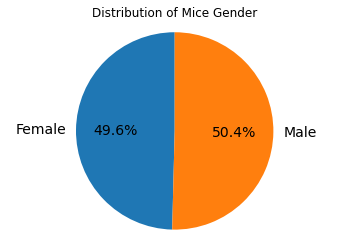

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=sorted(analysis_df["Sex"].unique())
mice_count=cnt_mice

plt.pie(mice_count, labels=gender, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.axis("equal")
plt.title("Distribution of Mice Gender")

plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [13]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
